# Imports

In [88]:
import torch
import torch.nn as nn
import  numpy as np  
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import csv                 


# Data loading

In [146]:
from asyncio.unix_events import BaseChildWatcher


input_size = 784
hidden_size = 100
hidden_size1 = 50 
num_classes = 10
num_epochs = 99
learning_rate = 0.001
batch_size = 100
train_size = 42000


training_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

training_set = training_df.to_numpy()
test_set = test_df.to_numpy()
test_set = torch.Tensor(test_set)

# print(test_set.type())

train = torch.tensor(training_set[0:train_size,1:],dtype=torch.float)
# validation = torch.tensor(training_set[train_size:,1:],dtype=torch.float)

labels_1 = torch.tensor(training_set[:train_size,0])
# labels_2 = torch.tensor(training_set[train_size:,0])

train_set = [(x,y) for x,y in zip(train, labels_1)]
# valid_set = [(x,y) for x,y in zip(test, labels_2)]

train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size= batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_set)
# valid_loader = torch.utils.data.DataLoader(dataset = valid_set)



# Creating the Layers of the model

In [151]:
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, hidden_size1 ,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size1)
        self.l3 = nn.Linear (hidden_size1, num_classes)

    def forward(self, x):
        out =  self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out  = self.l3(out)
        return out

In [152]:
model = NeuralNet(input_size, hidden_size, hidden_size1, num_classes)
criterion = nn.CrossEntropyLoss()
optimiser =  torch.optim.Adam(model.parameters(), lr = learning_rate)

# Itterations     

In [153]:
for epochs in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #forward
        # print(images.shape)
        outputs = model.forward(images)
        loss = criterion(outputs,labels)

        #backward
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()



    
    print(epochs, ":", loss.item())




0 : 0.11949945241212845
1 : 0.07637040317058563
2 : 0.04818029701709747
3 : 0.02066320925951004
4 : 0.024771468713879585
5 : 0.07663130015134811
6 : 0.11598420143127441
7 : 0.010200552642345428
8 : 0.004613140597939491
9 : 0.06974855065345764
10 : 0.02051982656121254
11 : 0.013673612847924232
12 : 0.008942343294620514
13 : 0.022337231785058975
14 : 0.002800854854285717
15 : 0.01602502539753914
16 : 0.008393585681915283
17 : 0.007031999062746763
18 : 0.003585232887417078
19 : 0.005792798474431038
20 : 0.00025255445507355034
21 : 0.001413283171132207
22 : 0.013556458055973053
23 : 0.0075735836289823055
24 : 0.012592175044119358
25 : 0.00014440904487855732
26 : 0.02191721275448799
27 : 0.008580420166254044
28 : 0.010984238237142563
29 : 3.685814590426162e-05
30 : 0.0006507794605568051
31 : 0.046180859208106995
32 : 0.00019918728503398597
33 : 0.00014187100168783218
34 : 0.00027896981919184327
35 : 0.07013764977455139
36 : 0.014296323992311954
37 : 0.004477542359381914
38 : 0.0382781960070

In [154]:
# with torch.no_grad():
#     n_correct = 0
#     n_samples = 0
#     for images, labels in valid_loader:
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         n_samples += labels.size(0)
#         n_correct += (predicted == labels).sum().item()

#     acc = 100.0 * n_correct / n_samples
#     print(f'Training Accuracy of the network on the {n_samples} test images: {acc} %')

In [155]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} training sample images: {acc} %')

Accuracy of the network on the 42000 training sample images: 99.70714285714286 %


In [156]:
header = ['ImageId','Label']
with open('result1.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        i = 1
        for images in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            row = (i,int(predicted))
            writer.writerow(row)
            i += 1
            # n_samples += labels.size(0)
            # n_correct += (predicted == labels).sum().item()

        # acc = 100.0 * n_correct / n_samples
        # print(f'Accuracy of the network on the {n_samples} training sample images: {acc} %')

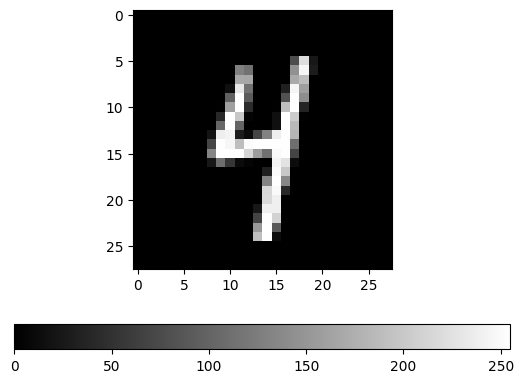

model prediction: 4
model 2 prediction: 4


In [142]:
import cv2
import pylab as plt
import numpy as np


test_number = 25
test_pic = test_df.to_numpy()
test_pic = test_pic[test_number,:].reshape(28,28)
test_pic.shape
# cv2.imshow("number", test_pic)

Z= test_pic
im = plt.imshow(Z, cmap='gray')
plt.colorbar(im, orientation='horizontal')
plt.show()


df = pd.read_csv('result.csv')
df2 = pd.read_csv('result1.csv')
print('model prediction:',df.iloc[test_number,1])
print('model 2 prediction:',df2.iloc[test_number,1])




In [157]:
not_same = []
for i in range(27999):
    if df.iloc[test_number,1] == df2.iloc[test_number,1]:
        pass
    else:
        not_same.append(i+1)
print(not_same)

[]
